In [70]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.constants import golden

In [71]:
# Plotting parameters, to make it nice :) 
matplotlib.rcParams['figure.figsize'] = (golden * 7, 7)
matplotlib.rcParams['figure.subplot.wspace'] = 0.5
matplotlib.rcParams['figure.subplot.left'] = 0.1
matplotlib.rcParams['figure.subplot.bottom'] = 0.2
matplotlib.rcParams['figure.subplot.right'] = 1
matplotlib.rcParams['figure.subplot.top'] = 0.85
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['axes.titlesize'] = 15

## The Fourier Transform in 2-dim

\begin{gather} F(u,v)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x,y)\cdot \mathrm e^{-i2\pi(ux+vy)}dxdy \\ f(x,y)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} F(u, v)\cdot\mathrm e^{i2\pi (ux+vy)}dudv\end{gather}

$u$ and $v$ represent the spatial frequencies. Same as 1-dim problems, the Fourier transform is based on a decomposition into functions $\mathrm e^{i2\pi ux}=\cos 2\pi ux + i\sin 2\pi ux$ which form an orthonogal basis. Then in 2-dim
\begin{equation} \mathrm e^{i2\pi(ux+vy)}=\cos2\pi(ux+vy)+i\sin2\pi(ux+vy) \end{equation}

- First we'll see how does the tranformation behaves with a rectangle centered at the origin, with sides of length $X$ and $Y$. In this case we need to make use of the function `np.fft.fft2`, please pay attention to the 3-dim plots and contour plots. Let's begin with the algebra

\begin{align} F(u, v ) &= \int\int f(x,y)\cdot\mathrm e^{-i2\pi(ux+vy)}dxdy = \int^{X/2}_{-X/2}\mathrm e^{-i2\pi(ux)}dx\int^{Y/2}_{-Y/2} \mathrm e^{-i2\pi(vy)}dy \\ & = \left[\frac{\mathrm e^{-i2\pi ux}}{-i2\pi ux}\right]^{X/2}_{-X/2} \left[\frac{\mathrm e^{-i2\pi vy}}{-i2\pi vy}\right]^{Y/2}_{-Y/2} = XY\frac{\sin\pi Xu}{\pi Xu}\frac{\sin\pi Yv}{\pi Yv} = \frac{1}{\pi^2 uv}\sin{\pi Xu}\sin{\pi Y v} \end{align}

In [216]:
# For a square centered in the origine with lenght d = 1.
X = 0.5
Y = 0.5

resolution = 2 ** 11
factor = 30

x = np.linspace(-X * factor, X * factor, resolution)
y = np.linspace(-Y * factor, Y * factor, resolution)

dx = x[1] - x[0]  # interval
dy = y[1] - y[0]

xx, yy = np.meshgrid(x, y)

aperture = np.zeros((x.size, y.size))
aperture[(np.abs(xx) < X / 2) & (np.abs(yy) < Y / 2)] = 1

# spatial frequencies
u, v = np.fft.fftfreq(x.size, dx), np.fft.fftfreq(y.size, dy)
u_shift, v_shift = np.fft.fftshift(u), np.fft.fftshift(v)
uu, vv = np.meshgrid(u_shift, v_shift)

# Functions for theoretical solution!
def sinc(a, A):
    res = np.sin(np.pi * A * a) / (np.pi * A * a)
    res[a == 0] = 1.0  # Goes to one in the limit
    return res

def FT_theory(u, v, X=X, Y=Y):
    return X * sinc(u, X) * Y * sinc(v, Y)

radiation_theory = FT_theory(uu, vv)
power_theory = np.abs(radiation_theory) ** 2

/Users/tomascassanelli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in true_divide


power_fft:  2.38418579102e-07
power_theory:  0.0625


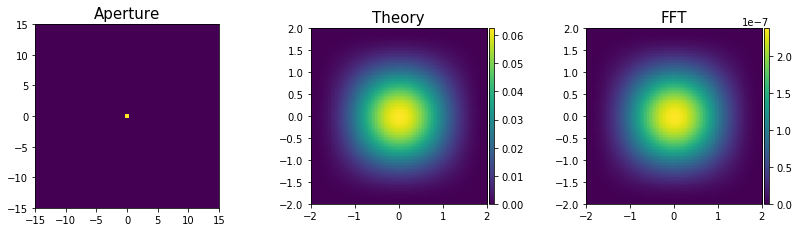

In [243]:
# FFT2 and normalization
norm = 1 / (x.size * y.size) ** (1 / 2)

radiation_fft = np.fft.fft2(aperture)
radiation_fft = radiation_fft / radiation_fft.max() * norm
power_fft = np.abs(np.fft.fftshift(radiation_fft)) ** 2


extent_aperture = [-X * factor, X * factor, -Y * factor, Y * factor]
extent_power = [u.min(), u.max(), v.min(), v.max()]

fig, ax = plt.subplots(ncols=3)

im0 = ax[0].imshow(aperture, extent=extent_aperture)
im1 = ax[1].imshow(power_theory, extent=extent_power)
im2 = ax[2].imshow(power_fft, extent=extent_power)

divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes("right", size="3%", pad=0.03)
cb1 = fig.colorbar(im1, cax=cax1)

divider2 = make_axes_locatable(ax[2])
cax2 = divider2.append_axes("right", size="3%", pad=0.03)
cb2 = fig.colorbar(im2, cax=cax2)

for i in range(1, 3):
    ax[i].set_xlim(-2, 2)
    ax[i].set_ylim(-2, 2)

ax[0].set_title('Aperture')
ax[1].set_title('Theory')
ax[2].set_title('FFT')

print('power_fft: ', power_fft.max())
print('power_theory: ', power_theory.max())
plt.show()

/Users/tomascassanelli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


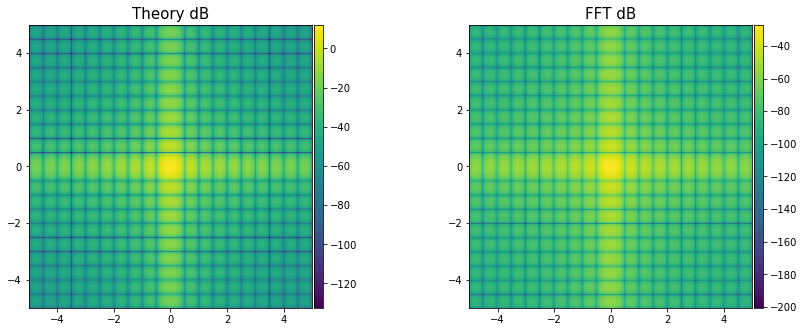

In [235]:
plt.close(fig)
fig, ax = plt.subplots(ncols=2)

im0 = ax[0].imshow(10 * np.log10(FT), extent=extent_F)
im1 = ax[1].imshow(10 * np.log10(FFT_shift), extent=extent_F)

divider0 = make_axes_locatable(ax[0])
cax0 = divider0.append_axes("right", size="3%", pad=0.03)
cb0 = fig.colorbar(im0, cax=cax0)

divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes("right", size="3%", pad=0.03)
cb1 = fig.colorbar(im1, cax=cax1)

for _ax in ax:
    _ax.set_xlim(-5, 5)
    _ax.set_ylim(-5, 5)

ax[0].set_title('Theory dB')
ax[1].set_title('FFT dB')
plt.show()